For every Machine Learning problem we need to follow some steps to ensure we understand the problem and define the required results for success :

### 1. Define the problem -
Given medical measurments of patient can we predict they have Heart desease?
### 2. Data summary - 
History of Data / Source of data
### 3. Evaluate model success - 
if we can reach 95% accuracy of prediction during proof of concept phase, then we can go ahead with the project
### 4. Features - 
understand available features either by searching online about the dataset or by talking to subject matter expert - we can create a features dictionary to understand features :

1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

now we can start preparing required tools to explore our dataset features and target


In [1]:
# import required EDA (exploratory data analysis) tools

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# plot graphs in notebook
%matplotlib inline

# import scikit-learn models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# import evaluation metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_roc_curve


In [2]:
# import dataset

df = pd.read_csv ("heart-disease.csv")
df.shape

(303, 14)

### Data Explorations -

we need to have some questions asked to every dataset inorder to understand the information and how to work with the dataset

1. what is the target of the data / what questions are we trying to solve ??
2. what are the types of data available / how to deal with them ??
3. Is there any missing data and how to deal with the missing data ??
4. where are the outliers and why we care aout them ??
5. How can we add, change and remove features to get more out of our data ??


In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
# check the target column - notice the target is balanced  
df ["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

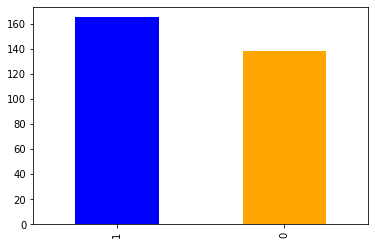

In [22]:
df ["target"].value_counts().plot( kind = "bar", color = ["blue", "orange"]);

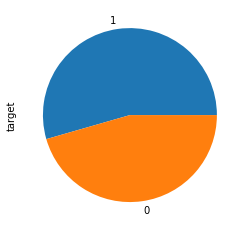

In [20]:
df["target"].value_counts().plot.pie();

In [10]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [23]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [25]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [27]:
# lets compare target column vs sex 

pd.crosstab(df["target"], df["sex"])

sex,0,1
target,,
0,24,114
1,72,93


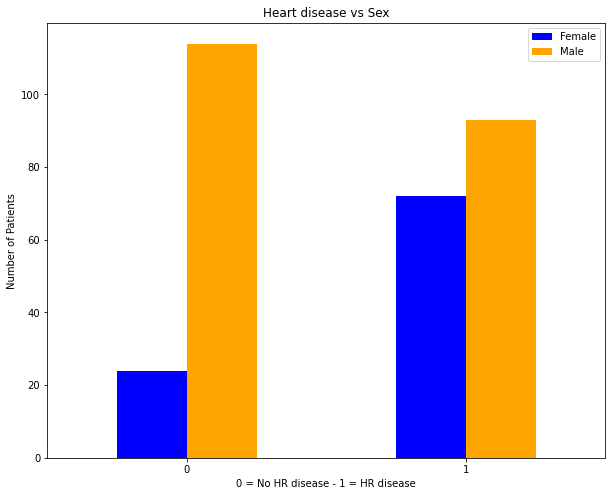

In [36]:
# lets plot and visualize the comparision

pd.crosstab(df["target"], df["sex"]).plot(kind = "bar",
                                          figsize = (10, 8),
                                          color = ["blue", "orange"])
plt.title("Heart disease vs Sex")
plt.xlabel("0 = No HR disease - 1 = HR disease")
plt.ylabel("Number of Patients")
plt.legend(["Female", "Male"])
plt.xticks(rotation = 0);

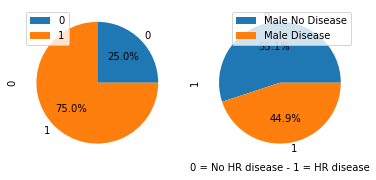

In [57]:
# lets try the bar chart
pd.crosstab(df["target"], df["sex"]).plot.pie(subplots = True,autopct='%1.1f%%')

plt.xlabel("0 = No HR disease - 1 = HR disease")
plt.legend(["Male No Disease", "Male Disease"])
plt.xticks(rotation = 0);

## lets check age and max heart rate VS target 

notice that the age and the max heart rate has many points so it wouldnot be visualy communicated in bar charts
so we can use the scatter 

In [58]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


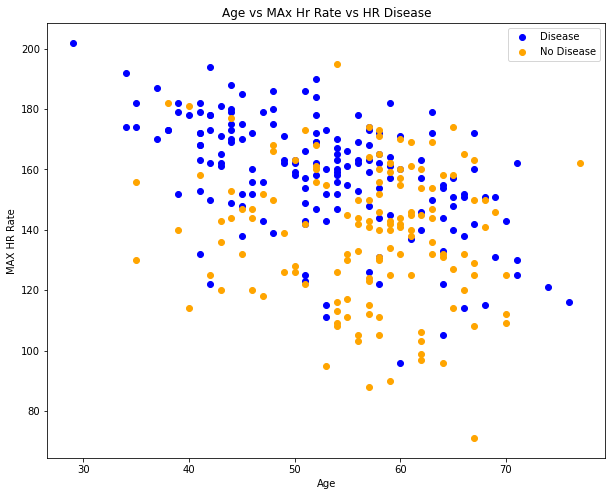

In [70]:
plt.figure(figsize = (10,8))
plt.scatter (df.age[df["target"] == 1],
             df.thalach[df["target"] ==1],
             c = "blue")
plt.scatter (df.age[df["target"] == 0],
             df.thalach[df["target"] ==0],
             c = "orange");
plt.title("Age vs MAx Hr Rate vs HR Disease")
plt.legend(["Disease", "No Disease"])
plt.xlabel("Age")
plt.ylabel("MAX HR Rate");

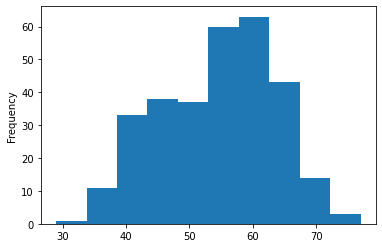

In [71]:
# lets check the age distribution
df.age.plot.hist();
# we notice largest age group is between (50 - 65)

In [72]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [75]:
# Lets check another feature vs HR disease (chest pain) cp

pd.crosstab(df.target, df.cp)



cp,0,1,2,3
target,,,,
0,104,9,18,7
1,39,41,69,16


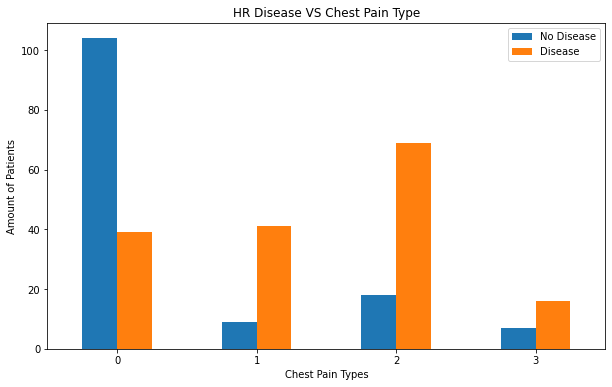

In [96]:
# lets make it more visual
pd.crosstab(df.cp, df.target).plot(kind = "bar",
                                   figsize = (10,6));
plt.title("HR Disease VS Chest Pain Type")
plt.legend(["No Disease", "Disease"])
plt.xlabel("Chest Pain Types")
plt.ylabel("Amount of Patients")
plt.xticks(rotation = 0);


In [82]:
# Lets build a correlation matrix to check correllations between features
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


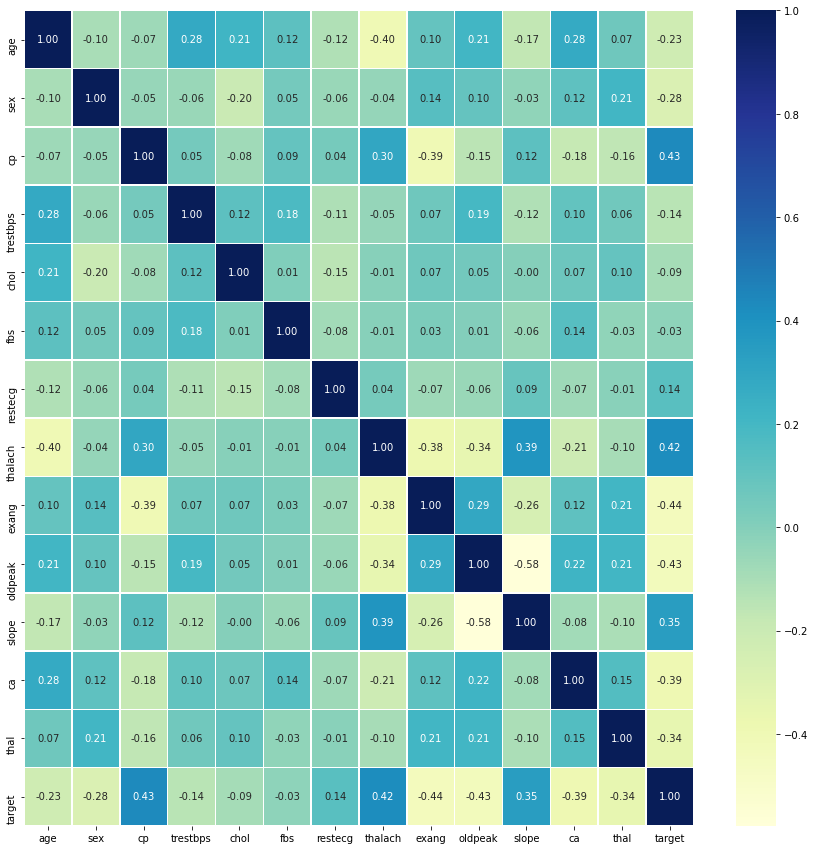

In [98]:
# lets make it more visual

corr_matrix = df.corr()
fig, ax = plt.subplots(figsize = (15, 15))
ax = sns.heatmap (corr_matrix,
                  annot = True,
                  fmt = ".2f",
                  linewidths = 0.5,
                  cmap = "YlGnBu");


In [91]:
pd.crosstab(df.exang, df.target)

target,0,1
exang,,
0,62,142
1,76,23


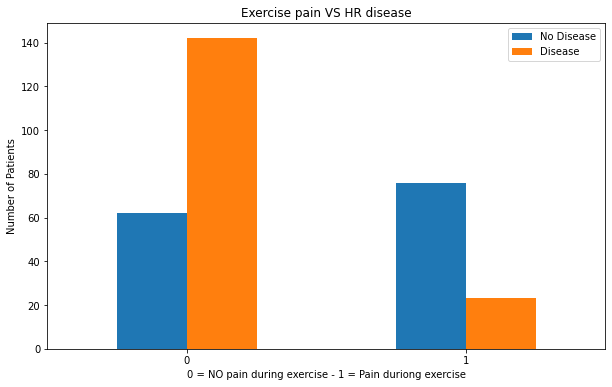

In [95]:
pd.crosstab(df.exang, df.target).plot(kind ="bar",
                                      figsize = (10,6),
                                      );
plt.title("Exercise pain VS HR disease")
plt.legend(["No Disease", "Disease"])
plt.xlabel ("0 = NO pain during exercise - 1 = Pain duriong exercise")
plt.ylabel ("Number of Patients")
plt.xticks(rotation = 0);


### 5. Modelling - 
After reviewing the problem definition and evaluation parameters and exploring features we are ready to start testing various machine learing models to choose the best performing model

In [4]:
# choose random seed 
np.random.seed(99)

# divide data set into X, y
X = df.drop ("target", axis = 1)
y = df["target"]

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split (X,
                                                     y,
                                                     test_size = 0.2)

In [102]:
X_train.shape, y_train.shape

((242, 13), (242,))

After reviewing Machine learning models map we are going to e testing three models
1. Logistic regression
2. K-nearest Neighbour
3. Random Forest Classifier 


In [5]:
# create a dictionary with the three models
models = {"Logistic regression" : LogisticRegression(),
          "KNN" : KNeighborsClassifier(),
          "Random Forest" : RandomForestClassifier()}

# create a function to fit and score models

def fit_and_score (models, X_train, X_test, y_train, y_test):
    #random seed
    np.random.seed(99)
    # create empty dictionary for scores
    model_score = {}
    # loop to fit models with training data
    for name, model in models.items():
        model.fit (X_train, y_train)
        # evaluate model score and append on model score dictionary
        model_score[name] = model.score (X_test, y_test)
    return model_score
        

In [6]:
model_score = fit_and_score (models,
                             X_train = X_train,
                             X_test = X_test,
                             y_train = y_train,
                             y_test = y_test)
model_score

C:\users\lenovo\ztm\projects\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic regression': 0.819672131147541,
 'KNN': 0.6557377049180327,
 'Random Forest': 0.8524590163934426}

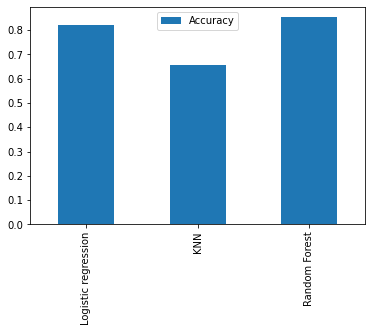

In [116]:
# lets make the results more visualized

model_compare = pd.DataFrame(model_score, index = ["Accuracy"])
model_compare.T.plot.bar(); # used the (.T.) to keep each model separate on the graph 

we have our baseline models ready we need to work on them start hypertune various parameters to ensure best accuracy then we need to compare precision / recall / f1 / ROC / AUC 

* hyperparameters tuning
* Features Importance 

* confusion Matrix
* Cross Validation
* Precision score
* Recall score
* f1 Score
* Classification Report
* ROC curve
* Area under curve (AUC)

Lets try tuning our models 
We start with the KNN tuning by using a loop to change the n_nieghbors
### KNN tuning by Hand 

In [6]:
# Knn Tuning
train_score = []
test_score = []

knn = KNeighborsClassifier()

neighbors = range (1, 21)

for i in neighbors:
    knn.set_params(n_neighbors = i)
    knn.fit(X_train, y_train)
    train_score.append(knn.score(X_train, y_train))
    test_score.append(knn.score(X_test, y_test))
    

In [7]:
train_score

[1.0,
 0.8099173553719008,
 0.7933884297520661,
 0.743801652892562,
 0.7603305785123967,
 0.7396694214876033,
 0.7355371900826446,
 0.731404958677686,
 0.7107438016528925,
 0.7148760330578512,
 0.6900826446280992,
 0.7024793388429752,
 0.7107438016528925,
 0.7024793388429752,
 0.7107438016528925,
 0.6983471074380165,
 0.6983471074380165,
 0.6900826446280992,
 0.6818181818181818,
 0.6735537190082644]

In [8]:
test_score

[0.639344262295082,
 0.5737704918032787,
 0.7049180327868853,
 0.6065573770491803,
 0.6557377049180327,
 0.6721311475409836,
 0.6229508196721312,
 0.6065573770491803,
 0.639344262295082,
 0.6229508196721312,
 0.6557377049180327,
 0.6229508196721312,
 0.639344262295082,
 0.6229508196721312,
 0.6557377049180327,
 0.6065573770491803,
 0.639344262295082,
 0.5901639344262295,
 0.6229508196721312,
 0.5901639344262295]

In [9]:
max(test_score)

0.7049180327868853

 The KNN max score on test data is 70.49%


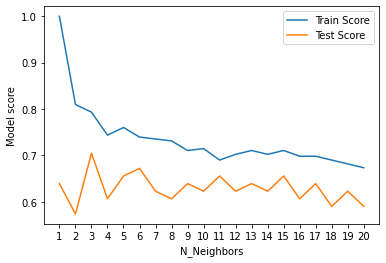

In [125]:
plt.plot(neighbors, train_score, label ="Train Score")
plt.plot(neighbors, test_score, label = "Test Score")
plt.xlabel ("N_Neighbors")
plt.ylabel ("Model score")
plt.xticks(np.arange(1, 21, 1))
plt.legend (["Train Score", "Test Score"]);
print (f" The KNN max score on test data is {max(test_score)*100:.2f}%")

## tuning Logistic Regression and Randm Forest classifier using RandomizedSearch CV 
we can check which hyperparameters we need to tune on the documentation of each model 
* Logistic Reggression
* RandomForest Classifier 
    

In [10]:
# create a search grid for each model

log_reg_grid = {"C" : np.logspace(-4, 4, 20),
                "solver" : ["liblinear"]}

rf_grid = {"n_estimators" : np.arange(10, 1000, 50),
           "max_depth" : [None, 2, 3, 5, 10],
           "min_samples_leaf" : np.arange (1, 20 , 2),
           "min_samples_split" : np.arange (2, 20, 2)}

In [11]:
# lets use randomsearchCV on logistic regression model
np.random.seed(99)
rs_log_reg = RandomizedSearchCV(LogisticRegression (),
                                param_distributions = log_reg_grid,
                                cv = 5,
                                n_iter = 20,
                                verbose = True)
rs_log_reg.fit (X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [12]:
rs_log_reg.best_params_


{'solver': 'liblinear', 'C': 0.08858667904100823}

In [13]:
rs_log_reg.score(X_test, y_test)

0.8524590163934426

In [14]:
model_score

NameError: name 'model_score' is not defined

In [15]:
# lets tune hyperparameters for Random Foerst model using RandomSearchCV

np.random.seed(99)

rs_rf = RandomizedSearchCV (RandomForestClassifier(),
                            param_distributions = rf_grid,
                            cv = 5, 
                            n_iter = 20,
                            verbose = True)
rs_rf.fit (X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.2min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 2, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [16]:
rs_rf.best_params_

{'n_estimators': 860,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 2}

In [17]:
rs_rf.score(X_test, y_test)

0.9344262295081968

In [18]:
rf_grid = {"n_estimators" : np.arange(100, 1000, 20),
           "max_depth" : [2],
           "min_samples_leaf" : np.arange (1, 10 , 2),
           "min_samples_split" : np.arange (2, 10, 2)}

In [19]:
# Now we can further tune our random forest calssifier model using gridSearchCV
np.random.seed (99)
gs_rf = GridSearchCV(RandomForestClassifier(),
                     param_grid = rf_grid,
                     cv = 3,
                     verbose = True)
# lets fit the grid search to training data
gs_rf.fit (X_train, y_train)

Fitting 3 folds for each of 900 candidates, totalling 2700 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2700 out of 2700 | elapsed: 37.7min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2],
                         'min_samples_leaf': array([1, 3, 5, 7, 9]),
                         'min_samples_split': array([2, 4, 6, 8]),
                         'n_estimators': array([100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340,
       360, 380, 400, 420, 440, 460, 480, 500, 520, 540, 560, 580, 600,
       620, 640, 660, 680, 700, 720, 740, 760, 780, 800, 820, 840, 860,
       880, 900, 920, 940, 960, 980])},
             verbose=True)

In [21]:
# check best parameters for gridsearch model
gs_rf.best_params_

{'max_depth': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 420}

In [22]:
# lets check the score of the model on the test set
gs_rf.score(X_test, y_test)

0.9344262295081968

### now its time to check on other metrics than the Accuracy

* ROC curve and AUC 
* Confusion Matrix
* Classification report
* Precision Score
* Recall Score
* F1 Score


In [23]:
# lets get some prediction from our model
y_preds = gs_rf.predict(X_test)


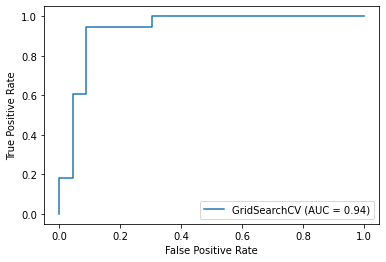

In [24]:
# lets plot ROC curve and calculate AUC
plot_roc_curve(gs_rf, X_test, y_test);

In [25]:
# prepare confusion matrix 

print (confusion_matrix(y_test, y_preds))

[[21  2]
 [ 2 36]]


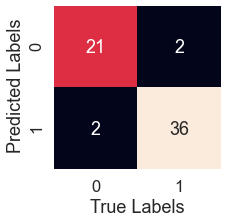

In [27]:
# lets use seaborn to make the confusion matrix more visual
# create printing function
sns.set(font_scale = 1.5)
def print_conf_mat(y_test, y_preds):
    
    fig, ax = plt.subplots(figsize = (3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot = True,
                     cbar = False)
    plt.xlabel("True Labels")
    plt.ylabel(" Predicted Labels")
    
print_conf_mat(y_test, y_preds)    

In [28]:
# lets check the Classification Report
print (classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        23
           1       0.95      0.95      0.95        38

    accuracy                           0.93        61
   macro avg       0.93      0.93      0.93        61
weighted avg       0.93      0.93      0.93        61



In [30]:
gs_rf.best_params_


{'max_depth': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 420}

In [31]:
# we need tp cross validate our Accuracy / presision / Recall / f1 scores
# create a new Random Forest classifier mmodel using best parameters
clf = RandomForestClassifier(n_estimators = 420,
                             max_depth = 2,
                             min_samples_split = 4,
                             min_samples_leaf = 1) 

In [33]:
cv_acc = cross_val_score (clf,
                          X,
                          y,
                          cv = 5,
                          scoring = "accuracy")
cv_acc = np.mean(cv_acc)
cv_acc

0.8316393442622951

In [34]:
cv_precision = cross_val_score (clf,
                          X,
                          y,
                          cv = 5,
                          scoring = "precision")
cv_precision = np.mean(cv_precision)
cv_precision

0.8208730158730159

In [35]:
cv_recall = cross_val_score (clf,
                          X,
                          y,
                          cv = 5,
                          scoring = "recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [37]:
cv_f1 = cross_val_score (clf,
                          X,
                          y,
                          cv = 5,
                          scoring = "f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8598069233817226

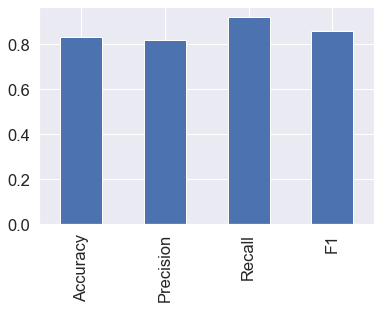

In [42]:
cv_metrics = pd.DataFrame ({"Accuracy" : cv_acc,
                            "Precision" : cv_precision,
                            "Recall" : cv_recall,
                            "F1" : cv_f1},
                            index =  [0])
cv_metrics.T.plot.bar(legend = False);


### Features Importance

In [46]:
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, min_samples_split=4, n_estimators=420)

In [47]:
clf.feature_importances_

array([0.02641461, 0.02087992, 0.21041427, 0.01354918, 0.01601547,
       0.00105383, 0.00810758, 0.13097865, 0.08693303, 0.10296988,
       0.06941678, 0.14755566, 0.16571113])

In [51]:
features_dict = dict(zip(df.columns, list(clf.feature_importances_)))
features_dict

{'age': 0.026414606308873694,
 'sex': 0.0208799215331139,
 'cp': 0.21041427130595608,
 'trestbps': 0.013549179517275129,
 'chol': 0.016015468204027463,
 'fbs': 0.0010538315067606854,
 'restecg': 0.00810758192573367,
 'thalach': 0.1309786542405152,
 'exang': 0.08693303495632868,
 'oldpeak': 0.10296987731597348,
 'slope': 0.06941677938750157,
 'ca': 0.14755566176341772,
 'thal': 0.1657111320345228}

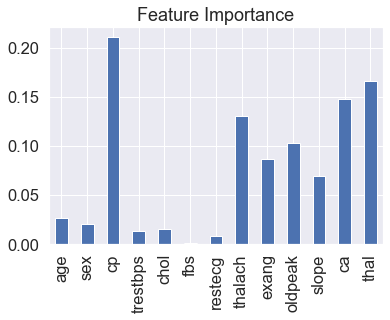

In [52]:
features_dict = pd.DataFrame(features_dict, index = [0])
features_dict.T.plot.bar(title = "Feature Importance",
                         legend = False);